In [0]:
from google.colab import files
uploaded = files.upload()

Saving MINDTREE.csv to MINDTREE.csv


In [0]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

df = pd.read_csv(io.BytesIO(uploaded['MINDTREE.csv']), encoding = 'unicode_escape')
print(df.head())
print(df.shape)

         Date    Open   High  ...  % Deli. Qty to Traded Qty  Spread H-L  Spread C-O
0  2019-05-30  983.85  984.6  ...                      57.73        4.60       -3.85
1  2019-05-29  982.30  985.7  ...                      57.68        5.70       -2.10
2  2019-05-28  984.70  985.0  ...                      59.48        8.55       -2.40
3  2019-05-27  987.90  987.9  ...                      59.27       12.80       -8.65
4  2019-05-24  982.00  984.0  ...                      33.01        5.75       -2.00

[5 rows x 13 columns]
(3030, 13)


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


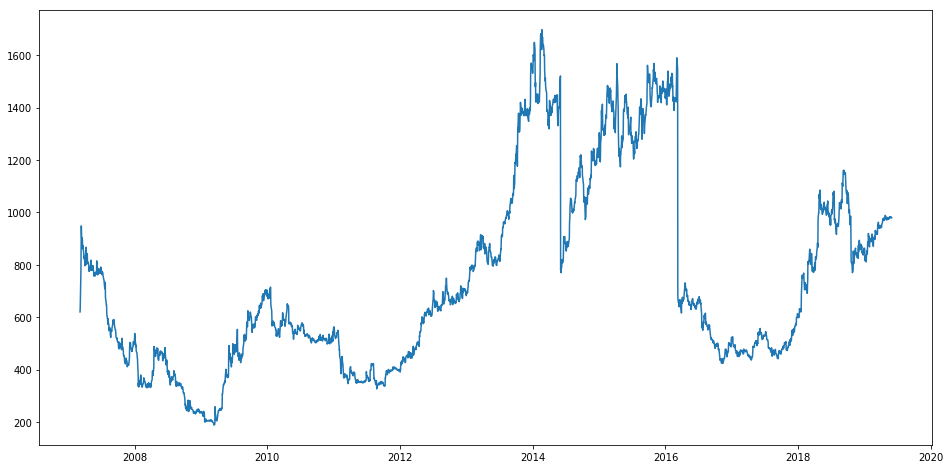

In [0]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [0]:
print(df['Date'].min(), df['Date'].max())
df1 = df[['Date', 'Close']]

2007-03-07 00:00:00 2019-05-30 00:00:00


<Figure size 1296x432 with 0 Axes>

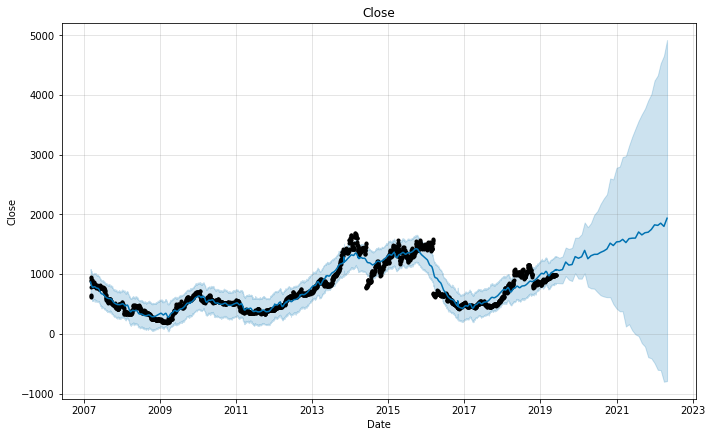

In [0]:
from fbprophet import Prophet
df1 = df1.rename(columns={'Date': 'ds', 'Close': 'y'})
model = Prophet(interval_width=0.95, daily_seasonality=True)
model.fit(df1)
forecast = model.make_future_dataframe(periods=36, freq='MS')
forecast = model.predict(forecast)
plt.figure(figsize=(18, 6))
model.plot(forecast, xlabel = 'Date', ylabel = 'Close')
plt.title('Close');

In [0]:
forecast1 = forecast
Close_names = ['Close_%s' % column for column in forecast.columns]
forecast1.columns = Close_names
forecast1 = forecast1.rename(columns={'Close_ds': 'Date'})
forecast1.head()


,Date,Close_trend,Close_yhat_lower,Close_yhat_upper,Close_trend_lower,Close_trend_upper,Close_additive_terms,Close_additive_terms_lower,Close_additive_terms_upper,Close_daily,Close_daily_lower,Close_daily_upper,Close_weekly,Close_weekly_lower,Close_weekly_upper,Close_yearly,Close_yearly_lower,Close_yearly_upper,Close_multiplicative_terms,Close_multiplicative_terms_lower,Close_multiplicative_terms_upper,Close_yhat
0,2007-03-07,653.971225,638.131642,1082.027331,653.971225,653.971225,215.041347,215.041347,215.041347,207.64272,207.64272,207.64272,-15.777407,-15.777407,-15.777407,23.176035,23.176035,23.176035,0.0,0.0,0.0,869.012572
1,2007-03-08,652.612259,644.618065,1076.102045,652.612259,652.612259,211.048896,211.048896,211.048896,207.64272,207.64272,207.64272,-14.866335,-14.866335,-14.866335,18.272510,18.272510,18.272510,0.0,0.0,0.0,863.661154
2,2007-03-09,651.253293,644.906065,1083.173876,651.253293,651.253293,206.871362,206.871362,206.871362,207.64272,207.64272,207.64272,-14.009020,-14.009020,-14.009020,13.237662,13.237662,13.237662,0.0,0.0,0.0,858.124655
3,2007-03-12,647.176395,606.072253,1059.618195,647.176395,647.176395,191.034055,191.034055,191.034055,207.64272,207.64272,207.64272,-14.567286,-14.567286,-14.567286,-2.041380,-2.041380,-2.041380,0.0,0.0,0.0,838.210450
4,2007-03-13,645.817429,600.951863,1036.399111,645.817429,645.817429,186.028612,186.028612,186.028612,207.64272,207.64272,207.64272,-14.628434,-14.628434,-14.628434,-6.985674,-6.985674,-6.985674,0.0,0.0,0.0,831.846041


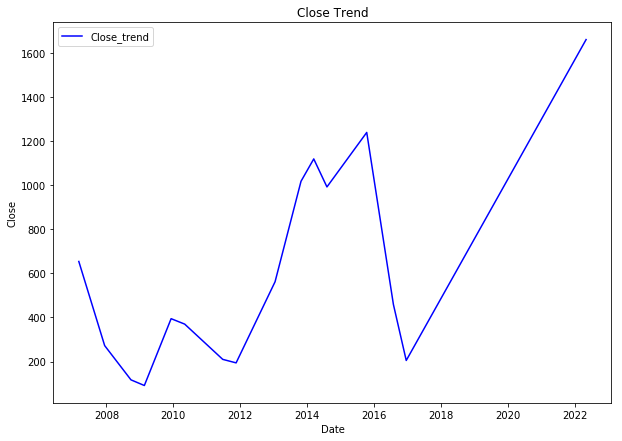

In [0]:
plt.figure(figsize=(10, 7))
plt.plot(forecast1['Date'], forecast1['Close_trend'], 'b-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Close')
plt.title('Close Trend');

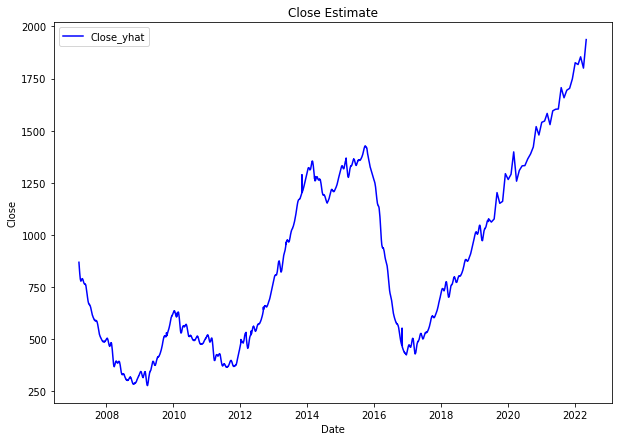

In [0]:
plt.figure(figsize=(10, 7))
plt.plot(forecast1['Date'], forecast1['Close_yhat'], 'b-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Close')
plt.title('Close Estimate');

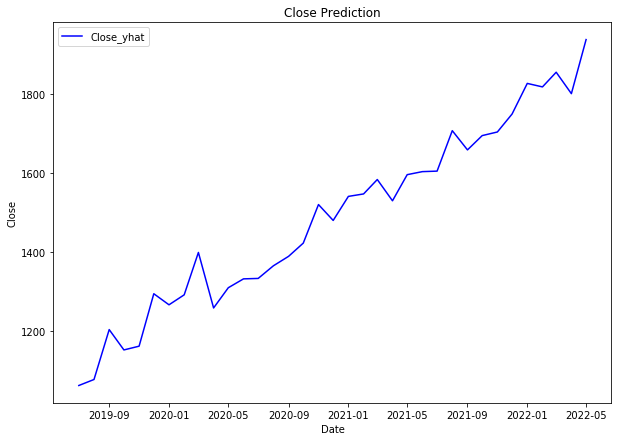

In [0]:
import datetime
from datetime import datetime
from datetime import timedelta

past = datetime.now() 

forecast2 = forecast1[forecast1.Date > past]
plt.figure(figsize=(10, 7))
plt.plot(forecast2['Date'], forecast2['Close_yhat'], 'b-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Close')
plt.title('Close Prediction');